<span class='note'><i>Make me look good.</i> Click on the cell below and press <kbd>Ctrl</kbd>+<kbd>Enter</kbd>.</span>

In [1]:
from IPython.core.display import HTML
HTML(open('css/custom.css', 'r').read())

<h5 class='prehead'>SM286D &middot; Introduction to Applied Mathematics with Python &middot; Spring 2020 &middot; Uhan</h5>

<h5 class='lesson'>Lesson 15.</h5>

<h1 class='lesson_title'>Steganography</h1>

## This lesson...

- Warm up: images as matrices
- What is steganography?
- Bit shifting
- Steganography

---

## Warm up

__Example.__
Make a 101 by 101 pixel image of the maritime flag for Z, pictured below. Display your image.

<img src="img/Zulu.png" alt="Drawing" style="width:200px;padding-bottom:20px;"/>

<center>Figure 1. The maritime flag for Z.</center>

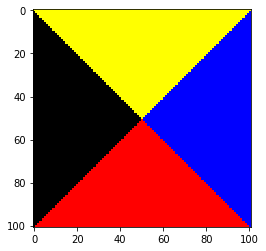

In [2]:
# Yellow = R: 255, G: 255, B: 0
# Blue = R: 0, G: 0, B: 255
# Red = R: 255, G: 0, B: 0

import numpy as np
import matplotlib.pyplot as plt

# Initialize 3D array of zeros
M = np.zeros((101, 101, 3), dtype='uint8')

# Loop over every pixel
# i = row, j = column
for i in range(101):
    for j in range(101):
        if i <= (100 - j) and j >= i: 
            # Yellow
            M[i, j, 0] = 255
            M[i, j, 1] = 255
        elif i > (100 - j) and j >= i: 
            # Blue
            M[i, j, 2] = 255
        elif i > j and i > (100 - j):
            # Red
            M[i, j, 0] = 255
            
# Display image
plt.imshow(M)

---

## What is steganography?

- Etymology of the word *steganography*:
    - $ \sigma \tau \epsilon \gamma \alpha \nu o \sigma $ (steganos): Covered, sheathed, enclosing, etc.
    - $ \gamma \rho \alpha \phi o \sigma $ (graphos): Writing, drawing, etc.

- __Steganography__ is the practice of concealing messages or information within other nonsecret text or data.
 
- Examples of steganography:
    - Herodotus (440 BC)
        > "When thou art come to Miletus, bid Aristagoras shave thy head, and look thereon."
    - Rear Admiral Jeremiah Denton, USN
        - USNA Class of 1947.
        - POW during Vietnam War.
        - In 1966, during a televised propaganda interview broadcast to United States, he blinked the word "TORTURE" using Morse code.

- __Our goal in this lesson: hiding images in other images.__

## Bit shifting

- Recall from the previous lesson... For binary numbers:
    - A 1 is known as an __on bit__ and a 0 is known as an __off bit__.
    - We index the bits from right to left, starting at 0.
    - The leftmost bit is the __most significant bit__. The rightmost bit is the __least signficant bit__.

- __Bit shifting__ is the act of moving the digits of a binary number to the left or right.

- For example, starting with $23 = [00010111]_2$:

\begin{align*}
\text{left-shift} & \Longrightarrow [00101110]_2\\
\text{right-shift} & \Longrightarrow [00001011]_2\\
\end{align*}

- Note:
    - when left-shifting, a new 0 was shifted into the rightmost position,
    - when right-shifting, a new 0 was shifted into the leftmost position.

- You can bit shift integers with NumPy using `np.left_shift()` [(documentation)](https://docs.scipy.org/doc/numpy/reference/generated/numpy.left_shift.html) and `np.right_shift()` [(documentation)](https://docs.scipy.org/doc/numpy/reference/generated/numpy.right_shift.html).

__Example.__ Using `np.left_shift()` and `np.right_shift()`, left-shift and right-shift the integer 23 by 1 bit. Does what you get match with the above?

In [3]:
# Left-shift 23 by 1 bit
left_shift = np.left_shift(23, 1)
print(f"Left-shift 23 by 1 bit: {left_shift}")

# Right-shift 23 by 1 bit
right_shift = np.right_shift(23, 1)
print(f"Right-shift 23 by 1 bit: {right_shift}")

Left-shift 23 by 1 bit: 46
Right-shift 23 by 1 bit: 11


_Write your notes here. Double-click to edit._

- If we left-shift 23, we get

    $$
    (0 \times 2^7) + (0 \times 2^6) + (1 \times 2^5) + (0 \times 2^4) + (1 \times 2^3) + (1 \times 2^2) + (1 \times 2^1) + (0 \times 2^0) = 32 + 8 + 4 + 2 = 46,
    $$
    
    which is what `np.left_shift()` returns.
    
- If we rightft-shift 23, we get

    $$
    (0 \times 2^7) + (0 \times 2^6) + (0 \times 2^5) + (0 \times 2^4) + (1 \times 2^3) + (0 \times 2^2) + (1 \times 2^1) + (1 \times 2^0) = 8 + 2 + 1 = 11,
    $$
    
    which is what `np.right_shift()` returns.

- What happens when we shift a value 2 bits to the right, and then 2 bits to the left?

In [4]:
# 6 = 00000110 in binary
r = 6

# Shift r 2 bits to the right, and then 2 bits to the left
print(np.left_shift(np.right_shift(r, 2), 2))

# 4 = 00000100 in binary

4


- This process zeros out the two rightmost bits (bits 0 and 1), resulting in the 8-bit integer $[00000100]_2$, which is equivalent to 4 in Base 10.

- We can also bit shift entire arrays, such as those representing an image.
 
- The code below shifts the array corresponding to the image file `calico_cat_in_greece.jpg` (in the same folder as this notebook)  6 bits to the right and then back 6 bits to the left.

- This process will zero out the rightmost 6 bits (bits 0, 1, 2, 3, 4, and 5).

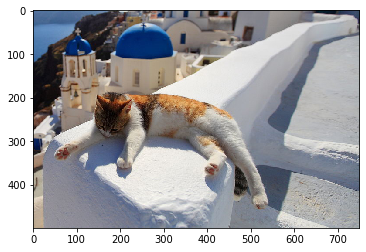

In [5]:
import matplotlib.image as img

# Read image file and store as array
cat = img.imread('calico_cat_in_greece.jpg')

# Show original image
plt.imshow(cat)

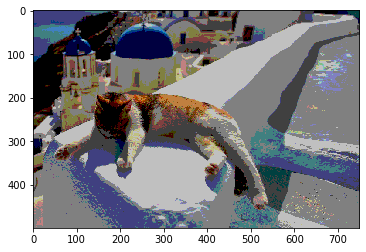

In [6]:
# Bit shift array: 6 to the right, then 6 to the left
cat_new = np.left_shift(np.right_shift(cat, 6), 6)

# Show resulting image
plt.imshow(cat_new)

- Note that the image looks similar, even though we changed 6 out of 8 bits representing the RGB values for each pixel... 🤔

## Steganography

- We use three 8-bit integers to represent the color of each pixel

- How important is each bit?

- Are some more important than others?

- How will switching certain bits to "off" affect the image?

### Turning bits off

- Figure 2 illustrates what happens when we switch the least signficant bit (bit 0) to the "off" position.

<img src="img/bit0a.png" alt="Drawing" style="width:400px;padding-bottom:20px;"/>

<center>Figure 2. Turning bit 0 off.</center>

- The code in the cell below turns "off" bits in order from least significant to most significant in the 3D array associated with the image in `GooseIsland.jpg` (in the same folder as this notebook).

- Compare the images below.  At what point do you start to be able to see a difference in the image?

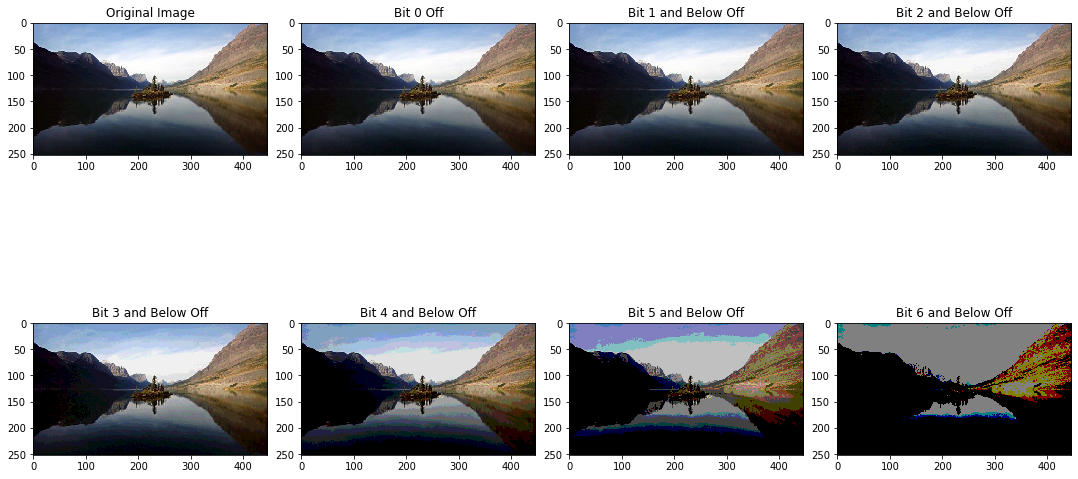

In [7]:
# Read the image file
goose_island = img.imread('GooseIsland.jpg')

# Create figure with size 15 (width) x 10 (height)
fig = plt.figure(figsize=(15, 10))

for i in range(8):
    # Add subplots in order from top left to bottom right
    # Remember that Matplotlib indexes subplots starting at 1
    ax = fig.add_subplot(2, 4, i + 1)
    
    # Shift the image left and right by i bits to zero out the bits in order
    # This will zero out the i rightmost bits
    img_shift = np.left_shift(np.right_shift(goose_island, i), i)
    
    # Plot the shifted image
    plt.imshow(img_shift)
    
    # Set title for subplot
    if i == 0:
        ax.set_title(f"Original Image")
    elif i == 1:
        ax.set_title(f"Bit {i - 1} Off")
    else:
        ax.set_title(f"Bit {i - 1} and Below Off")
        
# Display figure
fig.tight_layout(pad=.8)
fig.show(warn=False)  # Avoid backend warnings with keyword argument warn=False

- It is clear from the images above that as the bit number increases, the effect on the image increases as well.

### Hiding an image

- Read through the background section of Project 6 in order to get a short overview of the history of steganography, with particular emphasis on the experience of the U.S. Navy. 

- Then try the remaining problems, which will guide you through the process of hiding an image!

__Problem 1.__ Load the image in `football_team.jpg` (in the same folder as this notebook) into an array named `cover`. Display the image. We will call this the __cover image__: the image we will use to hide a secret image. 

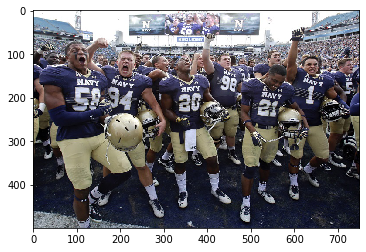

In [8]:
cover = img.imread('football_team.jpg')
plt.imshow(cover)

Bit shift the array `cover` 4 bits to the right and then 4 bits to the left to zero out the 4 lower bits. Call the new array `cover_shifted`. Display the bit shifted image.

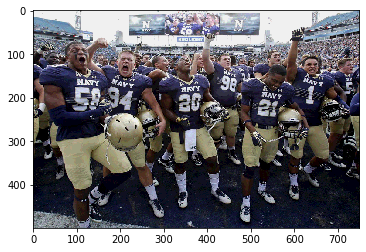

In [9]:
cover_shifted = np.left_shift(np.right_shift(cover, 4), 4)
plt.imshow(cover_shifted)

Now load the image in `enterprise.jpg` into an array named `secret`. We will call this the __secret image__: the image that we will hide and then later recover. Display the secret image. 

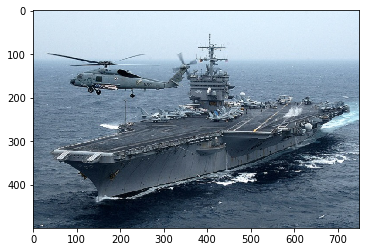

In [10]:
secret = img.imread('enterprise.jpg')
plt.imshow(secret)

Bit shift the array `secret` 4 bits to the right. Call the resulting array `secret_shifted`. Display the image.

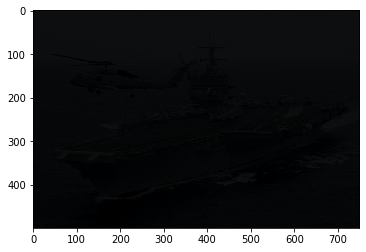

In [11]:
secret_shifted = np.right_shift(secret, 4)
plt.imshow(secret_shifted)

Add the arrays `cover_shifted` and `secret_shifted` together and store the result in an array named `steg`. Display the image. This is the image that we would, say, publish on a website for everyone to see. 

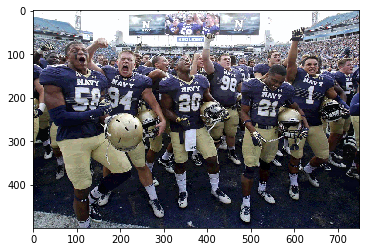

In [12]:
steg = cover_shifted + secret_shifted
plt.imshow(steg)

__Problem 2.__ Now pretend you're the one who needs to recover the secret. You've been given the image represented by the array `steg` you created in Problem 1. Bit shift the array `steg` 4 bits to the left. Store the result in an array named `recovered`. This is the image that we would recover, holding most of the information in `secret`. Display the image corresponding to `recovered`.  

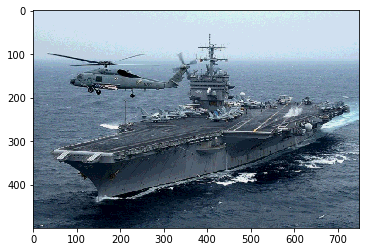

In [13]:
recovered = np.left_shift(steg, 4)
plt.imshow(recovered)

__Problem 3.__
In practice, you would write the `steg` array from Problem 1 to an image file. However, you need to be careful about which _image format_ you use.

In the code cells below, we write the `steg` array from Problem 1 to a JPEG file called `steg.jpg`. Then we try to read `steg.jpg` back into Python, and recover the secret image as we did in Problem 2.

In [14]:
# Write steg to a file
plt.imsave('steg.jpg', steg, format='jpg')

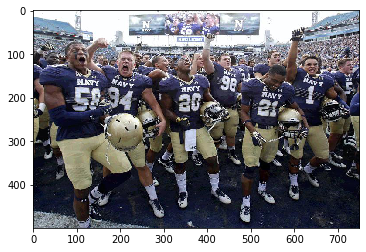

In [15]:
# Load the steganography image
# Display the image
steg_from_jpg = img.imread('steg.jpg')
plt.imshow(steg_from_jpg)

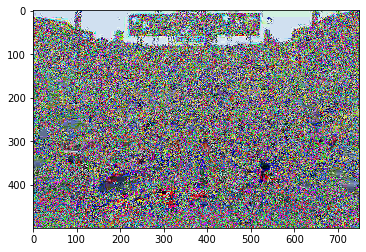

In [16]:
# Recover the secret image
# Display the recovered secret image
recovered_from_jpg = np.left_shift(steg_from_jpg, 4)
plt.imshow(recovered_from_jpg)

This isn't very useful... 😕

Why does this happen?
When you save an image as a JPEG file, the image is first compressed: not every color is saved in its original form. This leads to the loss of the less significant bits describing the contents of the pixels. 

Ordinarily, this wouldn't be a problem since our eyes can't see the difference in colors. However, if you are trying to store important information in the less significant bits of the saved image, compression will destroy that data. 

One way to correct this problem is to save our images in a format that doesn't try to compress the file. The PNG format is one such format. The code below saves and reads in the picture in PNG format. 

One issue is that when `img.imread()` reads a PNG file, it stores the color values as numbers between 0 and 1 instead of between 0 and 255. To fix this, we multiply the values by 255, round to the nearest integer, and then convert the result to the uint8 format.

In [17]:
# Write steg to a file using the PNG format, a lossless format!
plt.imsave('steg.png', steg, format='png')

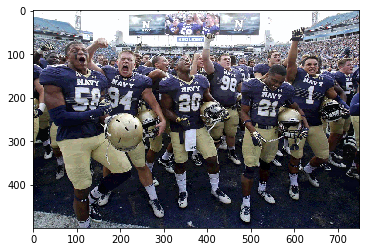

In [18]:
# Load the steganography image
# Display the image
steg_from_png = img.imread('steg.png')
plt.imshow(steg_from_png)

# PNG values are given as floats between 0 and 1 rather than 8-bit
# integers. We multiply by 255, round and convert the results to uint8.
steg_from_png_8bit = (steg_from_png * 255).round().astype(np.uint8)

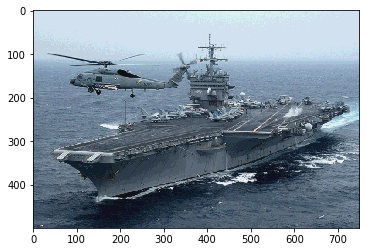

In [19]:
# Recover the secret image
# Display the recovered secret image
recovered_from_png = np.left_shift(steg_from_png_8bit, 4)
plt.imshow(recovered_from_png)

Much better! 👍

## Bonus classwork

__Attempt these only once you've completed the problems above.__

__Problem 4.__
Now we'll try a more complicated situation.

Sometimes the images you want to use for steganography aren't the same size. You can use another application (like Paint or Adobe Photoshop) to resize the images first so they are the same size.

In the same folder as this notebook, there are two image files, `Cinque-terre.jpg` and `Atlantic-Ocean-Road-in-Norway.jpg`.

To use the Paint application to resize these images:

- Open both files in the __Paint__ application (search for Paint in the Windows Start menu).

- In the __Home__ ribbon, click on the __Resize__ button. 

- A dialog box shoud appear. Click the __Pixels__ radio button to see the size of the image. You can adjust the image size by entering the new size in the spaces provided. 

- If you want to adjust the image size, and change the aspect ratio (the ratio of width to height), then unclick the __Maintain aspect ratio__ checkbox. 

Modify one or both of the files so that the two files have the same dimensions. Save the files and then hide one file inside the other. You should be able to reuse most of your code from Problems 1-3 with minor modifications. Try to recover the hidden file from the steganography file.

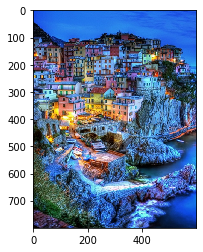

In [20]:
cover = img.imread('Cinque-terre-resized.jpg')
plt.imshow(cover)

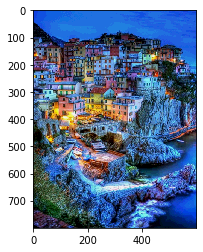

In [21]:
cover_shifted = np.left_shift(np.right_shift(cover, 4), 4)
plt.imshow(cover_shifted)

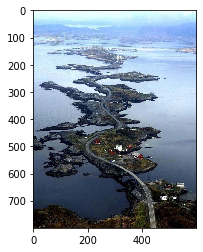

In [22]:
secret = img.imread('Atlantic-Ocean-Road-in-Norway-resized.jpg')
plt.imshow(secret)

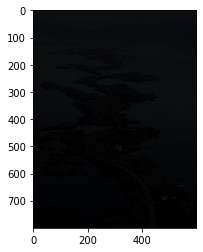

In [23]:
secret_shifted = np.right_shift(secret, 4)
plt.imshow(secret_shifted)

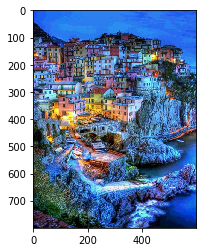

In [24]:
steg = cover_shifted + secret_shifted
plt.imshow(steg)

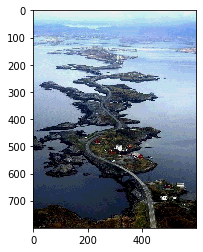

In [25]:
recovered = np.left_shift(steg, 4)
plt.imshow(recovered) 

__Problem 5.__
In the same folder as this notebook, there are image files called `chittorgarh_fort_india.jpg` and `Tuscany-Italy.jpg`. 

The picture of the fort is smaller than the picture of the Italian countryside. Make a new image of the fort
that is the same size as the picture of Tuscany, by surrounding the picture of the fort with a border. The border can by any color you choose. (See Problem 8 from Lesson 14 for hints.)

Next, hide the new image of the fort inside the picture of Tuscany. Recover your secret image from the steganography file. Are these good images to use for steganography? Why or why not? 

Size of Tuscany-Italy.jpg: 422 x 620


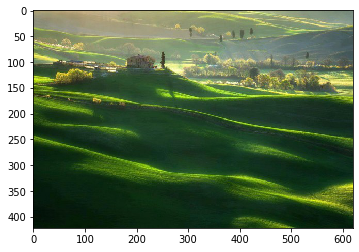

In [26]:
# Read in cover image
# Display cover image
cover = img.imread('Tuscany-Italy.jpg') 
plt.imshow(cover)

# Print size of cover image
cover_h, cover_w, cover_c = cover.shape
print(f'Size of Tuscany-Italy.jpg: {cover_h} x {cover_w}')

Size of chittorgarh_fort_india.jpg: 382 x 3


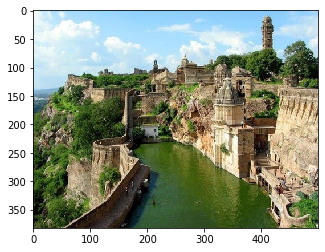

In [27]:
# Read in fort image
# Display fort image
fort = img.imread('chittorgarh_fort_india.jpg')
plt.imshow(fort)

# Size of fort image
fort_h, fort_w, fort_c = fort.shape
print(f'Size of chittorgarh_fort_india.jpg: {fort_h} x {fort_c}')

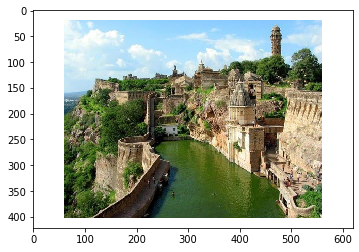

In [28]:
# Create secret image by adding a white border to the fort image
# Size of Tuscany image found above
# Placement of fort image chosen so that it is centered 
# Display secret image
secret = 255 * np.ones((cover_h, cover_w, cover_c), dtype='uint8')
secret[20:402, 60:560, 0:3] = fort
plt.imshow(secret)

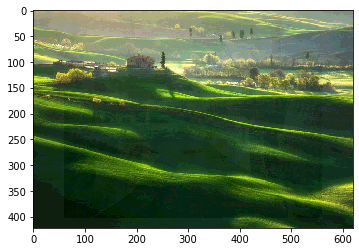

In [29]:
# Create steganography image: hide secret image in cover image
# Display steganography image
cover_shifted = np.left_shift(np.right_shift(cover, 4), 4)
secret_shifted = np.right_shift(secret, 4)
steg = cover_shifted + secret_shifted
plt.imshow(steg)

Note that the hidden image bleeds through the steganography image. These are not great images to use for steganography. 

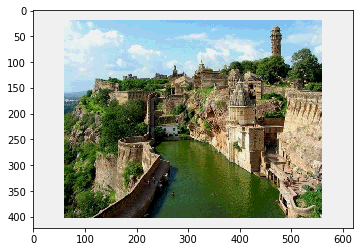

In [30]:
# Recover secret image from steganography image
recovered = np.left_shift(steg, 4)
plt.imshow(recovered)